This notebook contains the following:
'#01 - Importing Libraries
'#02 - Importing Data
'#03 - Data Cleaning
'#04 - Elbow Technique
'#05 - k-Means Clustering
'#06 - New Column for Clusters
'#07 - Visualizations using Clusters
'#08 - Do the Clusters make sense?
'#09 - Calculate Descriptive Statistics

# 01 - Importing Libraries

In [1]:
# Import libraries including new ones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.\n",
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to \"call\" them specifically.
%matplotlib inline

# 02 - Import Data

In [3]:
# import playoffsbio data set
path = r'C:\Users\jakey\OneDrive\Documents\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\Project Folder'

In [4]:
# import set
df_playoffsbio = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'playoffsbio.csv'), index_col = False)

# 03 - Data Cleaning

In [5]:
df_playoffsbio.shape

(5307, 21)

In [6]:
df_playoffsbio.head()

,playerId,season,first_name,last_name,team,position,games_played,icetime,gameScore,year,...,day,weight,height,nationality,shootsCatches,primaryNumber,playoffs,region,age,age_range
0,8471716,2008,Justin,Abdelkader,DET,L,10,4180,3.77,1987,...,25,214,74,USA,L,8,runner-up,north_america,21,under23
1,8471716,2009,Justin,Abdelkader,DET,L,11,4955,2.18,1987,...,25,214,74,USA,L,8,early,north_america,22,under23
2,8471716,2010,Justin,Abdelkader,DET,L,11,8881,-0.24,1987,...,25,214,74,USA,L,8,early,north_america,23,23-26
3,8471716,2011,Justin,Abdelkader,DET,L,5,3757,0.52,1987,...,25,214,74,USA,L,8,early,north_america,24,23-26
4,8471716,2012,Justin,Abdelkader,DET,L,12,12206,8.38,1987,...,25,214,74,USA,L,8,early,north_america,25,23-26


In [7]:
# create a new column to represent playoff success as number
df_playoffsbio.loc[df_playoffsbio['playoffs'] == 'winner', 'playoff_round'] = '4'
df_playoffsbio.loc[df_playoffsbio['playoffs'] == 'runner-up', 'playoff_round'] = '3'
df_playoffsbio.loc[df_playoffsbio['playoffs'] == 'conference_final', 'playoff_round'] = '2'
df_playoffsbio.loc[df_playoffsbio['playoffs'] == 'early', 'playoff_round'] = '1'

In [8]:
# check the new column
df_playoffsbio.head()

,playerId,season,first_name,last_name,team,position,games_played,icetime,gameScore,year,...,weight,height,nationality,shootsCatches,primaryNumber,playoffs,region,age,age_range,playoff_round
0,8471716,2008,Justin,Abdelkader,DET,L,10,4180,3.77,1987,...,214,74,USA,L,8,runner-up,north_america,21,under23,3
1,8471716,2009,Justin,Abdelkader,DET,L,11,4955,2.18,1987,...,214,74,USA,L,8,early,north_america,22,under23,1
2,8471716,2010,Justin,Abdelkader,DET,L,11,8881,-0.24,1987,...,214,74,USA,L,8,early,north_america,23,23-26,1
3,8471716,2011,Justin,Abdelkader,DET,L,5,3757,0.52,1987,...,214,74,USA,L,8,early,north_america,24,23-26,1
4,8471716,2012,Justin,Abdelkader,DET,L,12,12206,8.38,1987,...,214,74,USA,L,8,early,north_america,25,23-26,1


In [10]:
df_cluster = df_playoffsbio[['season','games_played','icetime','gameScore','year','month','weight','height','age','playoff_round']]

In [11]:
# check the new df
df_cluster.head()

,season,games_played,icetime,gameScore,year,month,weight,height,age,playoff_round
0,2008,10,4180,3.77,1987,2,214,74,21,3
1,2009,11,4955,2.18,1987,2,214,74,22,1
2,2010,11,8881,-0.24,1987,2,214,74,23,1
3,2011,5,3757,0.52,1987,2,214,74,24,1
4,2012,12,12206,8.38,1987,2,214,74,25,1


In [15]:
df_cluster.shape

(5307, 10)

In [16]:
# check for missing values
df_cluster.isnull().sum()

season             0
games_played       0
icetime            0
gameScore        375
year               0
month              0
weight             0
height             0
age                0
playoff_round      0
dtype: int64

In [17]:
# drop rows with nan for gameScore, these are goalies, unnecessary for this analysis.
df_cluster.dropna(inplace = True)

C:\Users\jakey\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
# check df
df_cluster.shape

(4932, 10)

# 04 - Elbow Technique

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Creates a score that represents
# a rate of variation for the given cluster option.

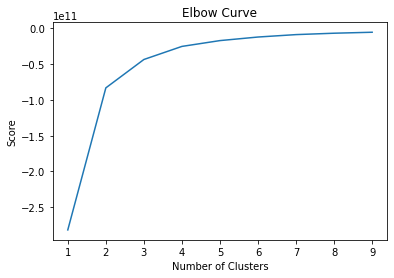

In [21]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In the graph above, it appears we should have either three or four clusters

# 05 - k-Means Clustering

In [22]:
# create the k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [23]:
# Fit the k-means object to the data.
kmeans.fit(df_cluster)

C:\Users\jakey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

# 06 - New Column for Clusters

In [24]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

C:\Users\jakey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jakey\AppData\Local\Temp/ipykernel_36532/2810219287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['clusters'] = kmeans.fit_predict(df_cluster)


In [25]:
df_cluster.head()

,season,games_played,icetime,gameScore,year,month,weight,height,age,playoff_round,clusters
0,2008,10,4180,3.77,1987,2,214,74,21,3,0
1,2009,11,4955,2.18,1987,2,214,74,22,1,0
2,2010,11,8881,-0.24,1987,2,214,74,23,1,0
3,2011,5,3757,0.52,1987,2,214,74,24,1,0
4,2012,12,12206,8.38,1987,2,214,74,25,1,2


In [26]:
df_cluster['clusters'].value_counts()

0    3040
2    1312
1     580
Name: clusters, dtype: int64

# 07 - Visualizations using Clusters

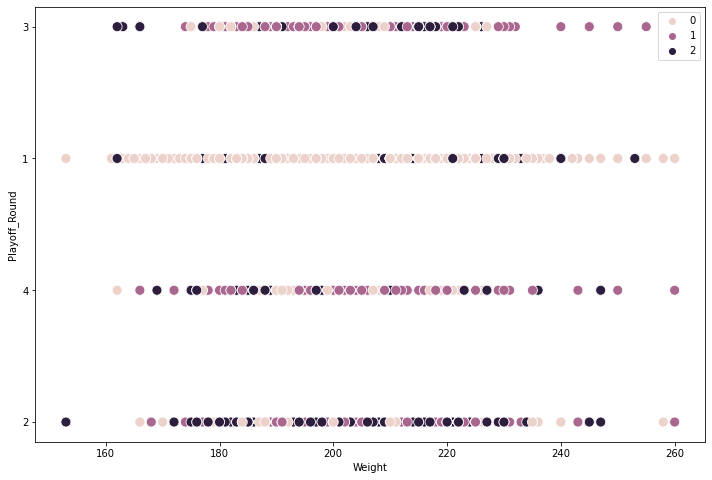

In [27]:
# Plot the clusters for the "playoff_round" and "weight" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['weight'], y=df_cluster['playoff_round'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Weight') # Label x-axis.
plt.ylabel('Playoff_Round') # Label y-axis.
plt.show()

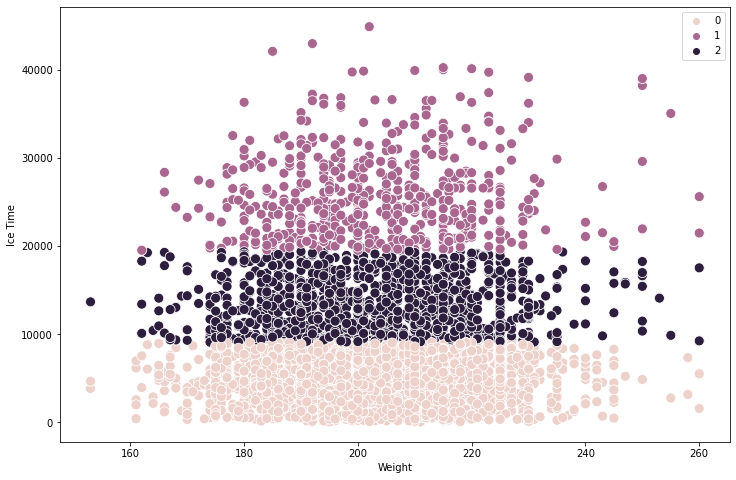

In [28]:
# Plot the clusters for the "icetime" and "weight" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['weight'], y=df_cluster['icetime'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Weight') # Label x-axis.
plt.ylabel('Ice Time') # Label y-axis.
plt.show()

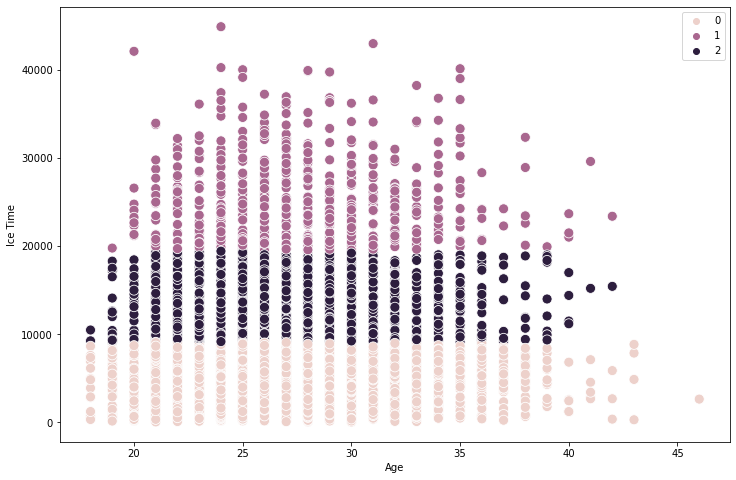

In [29]:
# Plot the clusters for the "icetime" and "age" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['age'], y=df_cluster['icetime'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Ice Time') # Label y-axis.
plt.show()

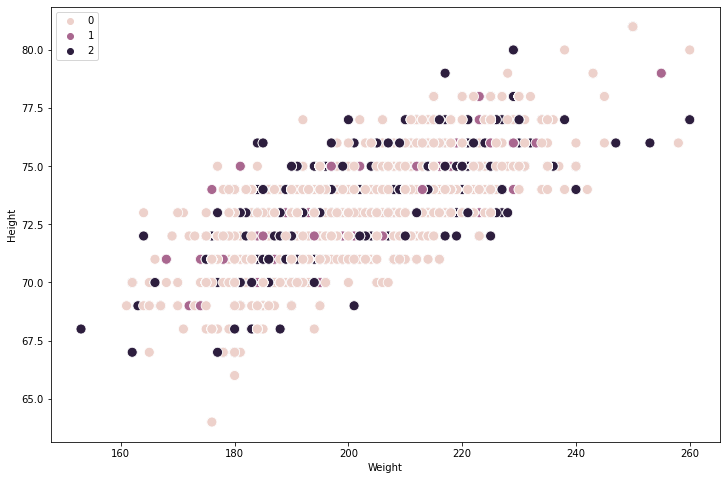

In [30]:
# Plot the clusters for the "height" and "weight" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['weight'], y=df_cluster['height'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Weight') # Label x-axis.
plt.ylabel('Height') # Label y-axis.
plt.show()

# 08 - Do the Clusters make sense?

Yes. They have been clustered depending on how far the player goes in the playoffs. Looking at ice time and playoff round we can see that the players have been clustered with those variables in mind.

# 09 - Calculate Descriptive Statistics

In [31]:
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'dark purple'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\jakey\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\jakey\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
df_cluster.groupby('cluster').agg({'season':['mean', 'median'], 'games_played':['mean', 'median'],'icetime':['mean', 'median'],'gameScore':['mean', 'median'], 'year':['mean', 'median'], 'month':['mean', 'median'], 'weight':['mean', 'median'], 'height':['mean', 'median'], 'age':['mean', 'median'], 'playoff_round':['mean', 'median']})

season         games_played              icetime           \
                    mean  median         mean median          mean   median   
cluster                                                                       
dark purple  2014.786585  2015.0    12.996189   12.0  13398.473323  13081.0   
pink         2014.584539  2015.0     5.406250    5.0   4728.062500   4874.0   
purple       2014.598276  2015.0    20.965517   22.0  25527.358621  24435.0   

             gameScore                 year             month         \
                  mean  median         mean  median      mean median   
cluster                                                                
dark purple   6.101181   5.490  1987.633384  1988.0  6.105183    6.0   
pink          1.628155   1.170  1987.482237  1988.0  6.063158    6.0   
purple       12.980190  12.065  1987.024138  1987.0  6.325862    6.0   

                 weight            height               age         \
                   mean median       mean median       mean median   
cluster                                                              
dark purple  202.477134  202.0  73.165396   73.0  27.153201   27.0   
pink         202.002632  202.0  73.082566   73.0  27.102303   27.0   
purple       203.917241  204.0  73.301724   73.0  27.574138   27.0   

            playoff_round         
                     mean median  
cluster                           
dark purple           inf    1.0  
pink                  inf    1.0  
purple                inf    3.0

# 10 - How will these results help?

Looking at the descriptive statistics and visualizations, we can see that height, weight and age do not have significant say in how far a player goes in the playoffs. Ice time, gameScore and games played are all a result of a player going further in the playoffs. There are plenty of other questions to dig into.